# ITK in Python

### Learning Objectives

* Learn how to write simple Python code with ITK
* Become familiar with the functional and object-oriented interfaces to ITK in Python
* Understand how to bridge ITK with machine learning libraries with [NumPy](https://numpy.org/)

# Working with NumPy and friends

* ITK is great at reading and processing images
* Some algorithms are not available in ITK
* NumPy is great at processing arrays in simple ways
* NumPy arrays can be read by many other Python packages
    * [matplotlib](https://matplotlib.org)
    * [scikit-learn](https://scikit-learn.org)
    * [PyTorch](https://pytorch.org)
    * [TensorFlow](https://www.tensorflow.org)
    * [scikit-image](https://scikit-image.org)
    * [OpenCV](https://opencv.org)

In [1]:
import itk
from itkwidgets import view

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image = itk.imread("data/KitwareITK.jpg")
view(image, ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageUC3; proxy …

In [4]:
array = itk.array_from_image(image)
print(array[1,1])

[51 56 60]


Let go the other way around: NumPy array to an ITK image. First, we create an array with some values.

In [5]:
def make_gaussian(size, fwhm=3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be considered an effective radius.
    """

    x = np.arange(0, size, 1, np.float32)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)


array = make_gaussian(11)

Let's look at the array. We use `matplotlib` or `itkwidgets.view` to do this.

(-0.5, 10.5, 10.5, -0.5)

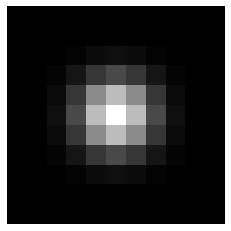

In [6]:
plt.gray()
plt.imshow(array)
plt.axis('off')

In [7]:
image = itk.image_from_array(array)
view(image, cmap='Grayscale', interpolation=False)

Viewer(cmap='Grayscale', geometries=[], gradient_opacity=0.22, interpolation=False, point_sets=[], rendered_im…

## Exercises

### Exercise 1: Visualize an image
* Read an image with ITK
* Apply a filter
* Show both original image and filtered images with matplotlib

In [8]:
image = itk.imread('data/CBCT-TextureInput.png', itk.F)

In [8]:
# %load solutions/2_ITK_in_Python_answers_Exercise1.py

## Views vs Copies

So far we have used

- `itk.array_from_image()`
- `itk.image_from_array()`.

Also available:

- `itk.array_view_from_image()`
- `itk.image_view_from_array()`

You can see the keyword **view** in both the names of these functions.

How to they differ in their behavior?

Let's compare the result of `itk.array_view_from_image()` and `itk.array_from_image()`.

Text(0.5, 1.0, 'Copy')

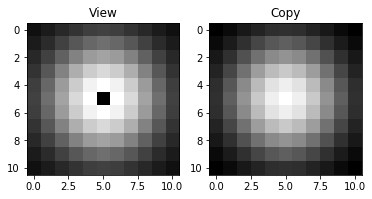

In [10]:
gaussian = itk.gaussian_image_source(size=11, sigma=3, scale=100, mean=[5,5])

arr_view_gaussian = itk.array_view_from_image(gaussian)
arr_gaussian = itk.array_from_image(gaussian)

gaussian.SetPixel([5,5], 0)

plt.subplot(1, 2, 1)
plt.imshow(arr_view_gaussian)
plt.title("View")

plt.subplot(1, 2, 2)
plt.imshow(arr_gaussian)
plt.title("Copy")

### Exercise 2: ITK image to NumPy array

* Read an image with ITK

--

* Convert image to NumPy array as a view
* Modify a pixel in the image
* Has the array been modified?

--

* Convert image to NumPy array as a copy
* Modify a pixel in the image
* Has the array been modified?

In [10]:
# %load solutions/2_ITK_and_NumPy_answers_Exercise2.py

## Templated Types

* Is my ITK type templated? (hint: usually, yes)

In [11]:
help(itk.Image)

Help on itkTemplate in module itkTemplate object:

itk::Image = class itkTemplate(builtins.object)
 |  itk::Image(name)
 |  
 |  This class manages access to available template arguments of a C++ class.
 |  
 |  This class is generic and does not give help on the methods available in
 |  the instantiated class. To get help on a specific ITK class, instantiate an
 |  object of that class.
 |  
 |  e.g.: median = itk.MedianImageFilter[ImageType, ImageType].New()
 |        help(median)
 |  
 |  There are two ways to access types:
 |  
 |  1. With a dict interface. The user can manipulate template parameters
 |  similarly to C++, with the exception that the available parameters sets are
 |  chosen at compile time. It is also possible, with the dict interface, to
 |  explore the available parameters sets.
 |  2. With object attributes. The user can easily find the available parameters
 |  sets by pressing tab in interperter like ipython
 |  
 |  Methods defined here:
 |  
 |  GetTypes(self)

* If so, you need to specify the data type
* This is similar to `dtype` in NumPy

In [12]:
import numpy
numpy.array([0,0], dtype=numpy.float)

array([0., 0.])

* Define and create a simple object

In [13]:
# A pixel Index is templated over the image dimension
IndexType = itk.Index[3]
index = IndexType()
print(index)

itkIndex3 ([0, 0, 0])


* Define and use smart pointer object

In [14]:
ImageType = itk.Image[itk.ctype('float'), 2]
my_image = ImageType.New()
print(my_image)

Image (0x55bd5f96ce60)
  RTTI typeinfo:   itk::Image<float, 2u>
  Reference Count: 1
  Modified Time: 246
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x55bd5f744e40)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Count: 1
      Modified Time: 247
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0
      Container manag

* Print list of available types

In [15]:
itk.Image.GetTypes()

<itkTemplate itk::Image>
Options:
  [<itkCType bool>, 2]
  [<itkCType bool>, 3]
  [<itkCType double>, 2]
  [<itkCType double>, 3]
  [<itkCType float>, 2]
  [<itkCType float>, 3]
  [<itkCType signed short>, 2]
  [<itkCType signed short>, 3]
  [<itkCType unsigned char>, 2]
  [<itkCType unsigned char>, 3]
  [<itkCType unsigned long long>, 2]
  [<itkCType unsigned long long>, 3]
  [<itkCType unsigned long>, 2]
  [<itkCType unsigned long>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD2'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD2'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD3'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD3'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD4'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD4'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorF2'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorF2'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVector

## Non-templated Types

* `MetaDataDictionary`

In [16]:
d = itk.MetaDataDictionary()
d['new_key'] = 5
print("'new_key' value: %d" % d['new_key'])

'new_key' value: 5


## Python Sequences for of ITK Objects

* Some ITK objects expect inputs of a certain ITK type. However, it is often more convenient to directly provide Python sequences, i.e. a `list` or `tuple`.

In [17]:
image = ImageType.New()
help(image.SetOrigin)

Help on method itkImageBase2_SetOrigin in module _itkImagePython:

itkImageBase2_SetOrigin(...) method of itkImagePython.itkImageF2 instance
    SetOrigin(itkPointD2 _arg)
    SetOrigin(double const * origin)
    itkImageBase2_SetOrigin(itkImageBase2 self, float const * origin)



* Use a Python `list` where an `itk.Index`, `itk.Point`, or `itk.Vector` is requested.

In [18]:
image.SetOrigin([2, 10])
print("Image origin: %s" % str(image.GetOrigin()))
print("Image origin: %s" % str(list(image.GetOrigin())))
print("Image origin: %s" % str(tuple(image.GetOrigin())))

Image origin: itkPointD2 ([2, 10])
Image origin: [2.0, 10.0]
Image origin: (2.0, 10.0)


# scikit-learn

* *scikit-learn* is a machine learning package in Python.
* scikit-learn is used to illustrate solving a problem using ITK and *NumPy* arrays.

In [19]:
import sklearn

First, we load 10 2D-images of circles with different radii and center position to which noise has been added and their corresponding ground truth segmentations.

itkSize2 ([50, 50])


Text(0.5, 1.0, 'Segmentation')

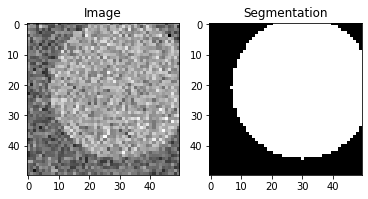

In [20]:
l_label = []
l_image = []

for i in range(0,10):
    image_name = 'data/sklearn/im%d.nrrd' % i
    image = itk.imread(image_name, itk.F)
    array = itk.array_from_image(image)
    l_image.append(array)
    
    label_name = 'data/sklearn/im%d_label.nrrd' % i
    image = itk.imread(label_name, itk.UC)
    array = itk.array_from_image(image)
    l_label.append(array)
    
size = itk.size(image)
print(size)

plt.subplot(1, 2, 1)
plt.imshow(l_image[0])
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(l_label[0])
plt.title("Segmentation")

The goal is to find the segmentation based on the input image.

We create arrays of data:
* X - the input samples
* Y - the target values

In [21]:
X0 = l_image[0].flatten()
X = X0

Y = l_label[0].flatten()

for i in range(1,10):
    X = np.concatenate((X, l_image[i].flatten()))
    Y = np.concatenate((Y, l_label[i].flatten()))

* We use a supervised learning methods based on Bayes’ theorem.
* The only information provided to the algorithm is the image intensity value.

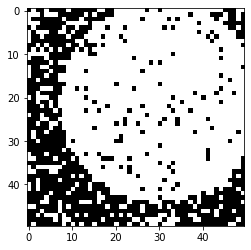

In [22]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X.reshape(-1,1), Y)

result = clf.predict(X0.reshape(-1,1)).reshape(size[0],size[1])
plt.imshow(result)

To improve our segmentation, we filter the input image with a median image filter and add this information as a second sample vector.

ITK is often used to read, reformat, denoise, and augment medical imaging data to improve the effectiveness of medical imaging models.

Text(0.5, 1.0, 'Median Filtered Image')

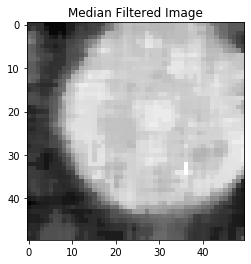

In [24]:
l_median = []
for i in range(0,10):
    image_name = 'data/sklearn/im%d.nrrd' % i
    image = itk.imread(image_name, itk.F)
    
    median=itk.MedianImageFilter(image, radius=3)
    
    array = itk.array_from_image(median)
    l_median.append(array)
    
plt.gray()
plt.imshow(l_median[0])
plt.title("Median Filtered Image")

In [25]:
M0 = l_median[0].flatten()
M = M0
X0 = np.concatenate((X0.reshape(-1,1),M0.reshape(-1,1)), axis=1)
for i in range(1,10):
    M = np.concatenate((M, l_median[i].flatten()))

X = np.concatenate((X.reshape(-1,1),M.reshape(-1,1)), axis=1)

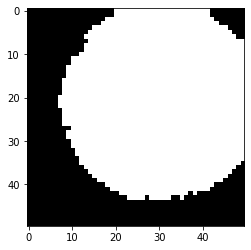

In [26]:
clf.fit(X, Y)
result = clf.predict(X0).reshape(50,50)
plt.imshow(result)

## Typical processing

* Resampling for consistent pixel grid size and spacing
* Image preprocessing
    * Bias field correction, e.g. `n4_bias_field_correction_image_filter`
    * Noise reduction, e.g. `smoothing_recursive_gaussian_image_filter`
    * Feature computation, e.g. texture, wavelet, or edge detector
* Converting ITK data to NumPy and organize the data as needed
* Train classifier
* Use classifier on new data
* Convert classifier result to ITK data
* Apply post processing filters
    * Fill holes, e.g. `binary_fillhole_image_filter`
    * Smoothing, e.g. `MedianImageFilter`

## Two ways of using ITK in Python

* Functional programming API
 * *Pythonic*
 * Eager execution
 * More concise
 * A few functions and filters are not available
* Object-oriented way
 * Set up processing pipelines
 * Delayed execution
 * Full access to ITK
 * Conserve memory
   * Optimally re-use and release pixel buffer memory
   * Stream process pipelines in chunks

## Let's start with the Pythonic way

In [27]:
image = itk.imread("data/CBCT-TextureInput.png", itk.ctype('float'))

In [29]:
filtered_image = itk.MedianImageFilter(image, radius = 3)

In [30]:
view(filtered_image, ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

### Pythonic exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `MeanImageFilter`
* Replace filter with `OtsuThresholdImageFilter`
* Visualize results

Uncomment and change the radius of the filter and observe the result.

In [33]:
# median_filtered_image = itk.MedianImageFilter(image, radius = XX)
# view(median_filtered_image)

In [35]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_median.py

Uncomment and replace filter with `MeanImageFilter`

In [36]:
# mean_filtered_image = itk.filter(image, radius = 5)
# view(mean_filtered_image)

In [36]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_mean.py

Uncomment and replace filter with `OtsuThresholdImageFilter`

In [44]:
# otsu_filtered_image = itk.filter(image)
# view(otsu_filtered_image)

In [45]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_otsu.py

## Object-oriented

* Two types of C++ ITK objects
 * Smart pointers (hint: most ITK objects are smart pointers)
 * "Simple" objects
* Translates in two ways of creating objects in Python
 * `obj = itk.SmartPointerObjectType.New()` (use auto-completion to see if `New()` method exists)
 * `obj = itk.SimpleObjectType()`

## Examples of objects

* With `New()` method:
 * `itk.Image`
 * `itk.MedianImageFilter`
* Without `New()` method:
 * `itk.Index`
 * `itk.RGBPixel`


## Filters with object-oriented syntax

In [47]:
PixelType = itk.ctype('float')
image = itk.imread("data/CBCT-TextureInput.png", PixelType)

ImageType = itk.Image[PixelType, 2]
median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
median_filter.SetInput(image)
median_filter.SetRadius(4)
median_filter.Update()
view(median_filter.GetOutput(), ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

### Object-oriented exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `MeanImageFilter`
* Replace filter with `OtsuThresholdImageFilter`
* Visualize results

Uncomment and change the radius of the filter and observe the result.

In [26]:
# median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
# median_filter.SetInput(image)
# median_filter.SetRadius(XX)
# median_filter.Update()
# median_filtered_image = median_filter.GetOutput()
# view(median_filtered_image)

In [50]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_MedianFilter.py

Uncomment and edit to use `MeanImageFilter`

In [30]:
# mean_filter = itk.XX[ImageType, ImageType].New()
# mean_filter.SetInput(XX)
# mean_filter.SetRadius(XX)
# mean_filter.Update()
# mean_filtered_image = mean_filter.GetOutput()
# view(mean_filtered_image)

In [54]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_MeanFilter.py

Uncomment and replace filter with `OtsuThresholdImageFilter`

In [34]:
# InputImageType = itk.Image[itk.ctype('float'), 2]
# OutputImageType = itk.Image[itk.ctype('short'), 2]

# otsu_filter = itk.OtsuThresholdImageFilter[XX]
# XX

In [56]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_OtsuFilter.py

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageSS2; proxy …

## ITK Object-oriented Summary
* Has `New()` method?
  * Call `Update()` with filters!

## Supported Image Types

### Unsupported (image) types

ITK filters have compile-time performance optimized for a specific image types and dimensions.

When an attempt is made to use a filter with an image type that is not supported, a error will occur like:

`KeyError: "itkTemplate : No template [<class 'itkImagePython.itkImageD2'>] for the itk::ImageFileReader class"`

In [30]:
# image = itk.imread("data/BrainProtonDensitySlice.png", itk.D)
# print(image)

To find the supported types for a filter, call `.GetTypes()` on the filter. `itk.imread` wraps, the `itk.ImageFileReader` filter.

In [25]:
itk.ImageFileReader.GetTypes()

<itkTemplate itk::ImageFileReader>
Options:
  [<class 'itkCoocurrenceTextureFeaturesImageFilterPython.itkImageVF82'>,]
  [<class 'itkCoocurrenceTextureFeaturesImageFilterPython.itkImageVF83'>,]
  [<class 'itkImagePython.itkImageCF2'>,]
  [<class 'itkImagePython.itkImageCF3'>,]
  [<class 'itkImagePython.itkImageCVF22'>,]
  [<class 'itkImagePython.itkImageCVF23'>,]
  [<class 'itkImagePython.itkImageCVF32'>,]
  [<class 'itkImagePython.itkImageCVF33'>,]
  [<class 'itkImagePython.itkImageCVF42'>,]
  [<class 'itkImagePython.itkImageCVF43'>,]
  [<class 'itkImagePython.itkImageF2'>,]
  [<class 'itkImagePython.itkImageF3'>,]
  [<class 'itkImagePython.itkImageRGBAUC2'>,]
  [<class 'itkImagePython.itkImageRGBAUC3'>,]
  [<class 'itkImagePython.itkImageRGBUC2'>,]
  [<class 'itkImagePython.itkImageRGBUC3'>,]
  [<class 'itkImagePython.itkImageSS2'>,]
  [<class 'itkImagePython.itkImageSS3'>,]
  [<class 'itkImagePython.itkImageUC2'>,]
  [<class 'itkImagePython.itkImageUC3'>,]
  [<class 'itkImagePython.

One approach to handle this type of error is is to read the image into a supported pixel type:

In [27]:
image = itk.imread("data/KitwareITK.jpg", itk.F)

Another approach is to cast the image to a supported image type:

In [28]:
InputImageType = itk.Image[itk.F, 2]
OutputImageType = itk.Image[itk.UC, 2]
cast_filter = itk.CastImageFilter[InputImageType, OutputImageType].New(image)
cast_filter.Update()

## Appendix

### Functions to know
* `itk.imread(file_name [, pixel_type])`
* `itk.imwrite(image, file_name [, compression])`
* `itk.array_from_image(image)` and `itk.array_view_from_image(image)`
* `itk.image_from_array(arr)` and `itk.image_view_from_array(arr)`

### Pixel types - Two options
* itk.ctype('float'), itk.ctype('unsigned char')
* itk.F, itk.UC

### Convenience functions
* `itk.size(image)`
* `itk.spacing(image)`
* `itk.origin(image)`
* `itk.index(image)`
* `itk.physical_size(image)`

See also: the **[ITK Python Quick Start Guide](https://itkpythonpackage.readthedocs.io/en/latest/Quick_start_guide.html)**

### Enjoy ITK!